<a href="https://colab.research.google.com/github/sakshikorpade/Emotion-Recognition-from-Multichannel-EEG-Signals-using-GCNN/blob/main/EEG_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visibility_graph

In [ ]:
!pip install imgaug==0.2.6

     |████████████████████████████████| 634kB 13.9MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp37-none-any.whl size=654019 sha256=7919d22df8b9baad6698dc27b81f56b190b5db11503e05dbf678534a3f0d2f10
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 14.0MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556427 sha256=a64118fbc158b3eabdca6b7cc287fd304ba5db733eb50f6596a2fab102b32ad1
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [ ]:
from visibility_graph import visibility_graph
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import math
import numpy as np
import networkx as nx
from itertools import repeat
import functools
from scipy.sparse import csr_matrix
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
a_file = open("eeg.txt")

lines = a_file.readlines()[1:]
result = []
result1 = []
for x in lines:
    result.append(x.split('\t')[0])
    result1.append(x.split('\t')[1])
a_file.close()
result = np.array(result)
result = result.astype(float)
result1 = np.array(result1)
result1 = result1.astype(float)
#result = result[result > 720]
#result = result[result <= 1320]
#print(len(result))
#print(result1)
#print(len(result1))

i1 = np.where(result == 0.169)
i1 = functools.reduce(lambda sub, ele: sub * 10 + ele, i1)
i1 = len(i1)-1
print(i1)
i2 = np.where(result <= 5.00)
i2 = functools.reduce(lambda sub, ele: sub * 10 + ele, i2)
i2 = len(i2)-1
print(i2)
print(i2 - i1)
result1 = result1[i1:i2+1]
print(result1)
x_axis = np.arange(0, len(result1), 1)

0
461
461
[  0.    0.  105.7  81.6 105.7  81.6 105.7  81.6 -15.6 -11.1 -15.6 -11.1
 -15.6 -11.1 -15.6 -11.1 -15.6 -11.1 -15.6 -11.1 -15.6 -11.1 -15.6 -11.1
  -8.4 -17.5  -8.4 -17.5  -8.4 -17.5 -15.   -9.8 -15.   -9.8 -15.   -9.8
 -15.   -9.8 -15.   -9.8 -15.   -9.8 -15.   -9.8 -12.6 -13.3 -12.6 -13.3
 -12.6 -13.3 -12.6 -13.3 -14.6  -3.3 -14.6  -3.3 -14.6  -3.3 -14.6  -3.3
 -14.6  -3.3 -14.6  -3.3 -14.6  -3.3 -10.5 -13.6 -10.5 -13.6 -10.5 -13.6
 -10.5 -13.6 -17.4 -23.6 -21.4 -21.5 -21.4 -21.5 -21.4 -21.5 -21.4 -21.5
 -21.4 -21.5 -21.4 -21.5 -21.4 -21.5 -16.5  -6.2 -16.5  -6.2 -16.5  -6.2
 -16.5  -6.2  -7.  -14.6  -7.  -14.6  -7.  -14.6  -7.  -14.6  -7.  -14.6
  -7.  -14.6  -7.  -14.6 -27.8 -18.8 -27.8 -18.8 -27.8 -18.8 -27.8 -18.8
 -27.8 -18.8 -10.7 -29.8 -10.7 -29.8 -10.7 -29.8 -10.7 -29.8 -10.7 -29.8
 -10.7 -29.8  -4.4 -19.7  -4.4 -19.7  -4.4 -19.7  -4.4 -19.7 -31.2 -22.6
 -31.2 -22.6 -31.2 -22.6 -31.2 -22.6 -31.2 -22.6 -31.2 -22.6 -31.2 -22.6
 -24.8 -22.5 -24.8 -22.5 -24.8 -22.5 -24.

In [ ]:
# Creating dataset
marks = np.array([70, 50, 40, 90, 55, 85, 74, 66, 33, 11, 45, 36, 89])
  
# Creating histogram
fig, ax = plt.subplots(1, 1)
ax.hist(marks)
  
# Set title
ax.set_title("Title")
  
# adding labels
ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
  
# Make some labels.
rects = ax.patches
labels = ["label%d" % i for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')
  
# Show plot
plt.show()

AttributeError: ignored

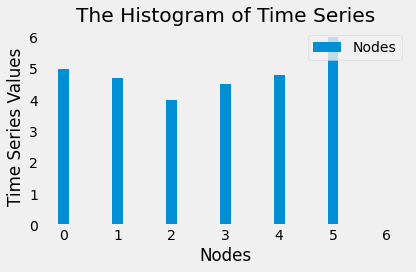

In [ ]:
series = [5, 4.7, 4, 4.5, 4.8, 6, 0]
x_axis = np.arange(0, len(series), 1)
plt.bar(x_axis, series, width = 0.2, label = "Nodes")
plt.style.use('fivethirtyeight')
plt.xlabel("Nodes")
plt.ylabel("Time Series Values")
plt.legend(loc="upper right")
plt.title("The Histogram of Time Series")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
# Forward Weighted Horizontal Visibility Graph
# Create an weight matrix A

list1 = []
list2 = []
series = [5, 4.7, 4, 4.5, 4.8, 6, 0]

for i in range(0, len(series)):
  count = 1
  list1.append(i)
  list2.append(i+count)
  if ((i+count+1) == len(series)):
    break
#  while ((series[i+count+1] <= series[i]) and (series[i] >= series[i+count]) and (series[i+count] <= series[i+count+1])):
  while ((series[i+count] <= series[i+count+1]) and (series[i] >= series[i+count])):
    list1.append(i)
    list2.append(i+count+1)
    if (series[i] < series[i+count+1]):
      break
    count = count+1
    if ((i+count+1) == len(series)):
      break
    if (series[i+count+1] < series[i+count]):
      break
#    if ((i+count+1) == len(series)):
#      break  
#    count = count+1
#    if ((i+count+1) == len(series)):
#      break 

joblib.dump(series,  'series.pkl')
joblib.dump(list1,  'list1.pkl')
joblib.dump(list2,  'list2.pkl')
#t = np.arange(0, len(list1), 1)
print(list1)
print(list2)

[0, 1, 1, 1, 2, 3, 4, 5]
[1, 2, 3, 4, 3, 4, 5, 6]


In [ ]:
series = [4.8, 4.8, 4.8, 4.8, 4.8, 4.8]
g = visibility_graph( series )

g.nodes()

g.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])

In [ ]:
from google.colab import files
#files.download('series.pkl')
#files.download('list1.pkl')
#files.download('list2.pkl')
series = joblib.load('series.pkl') 
list1 = joblib.load('list1.pkl') 
list2 = joblib.load('list2.pkl') 

In [ ]:
a = csr_matrix((len(series), len(series)), dtype = np.float).toarray()
for i in range(len(list1)):
  a[list1[i]][list2[i]] = round((np.arctan((series[list2[i]]-series[list1[i]])/(list2[i]-list1[i])) + np.arctan(series[list1[i]]/(list2[i]-list1[i]))),3) # rounds the decimal to 3 decimal places


In [ ]:
print(a)

[[0.    0.691 0.979 1.334 0.    0.   ]
 [0.    0.    1.706 0.    0.    0.   ]
 [0.    0.    0.    2.298 0.    0.   ]
 [0.    0.    0.    0.    0.725 1.702]
 [0.    0.    0.    0.    0.    2.437]
 [0.    0.    0.    0.    0.    0.   ]]


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


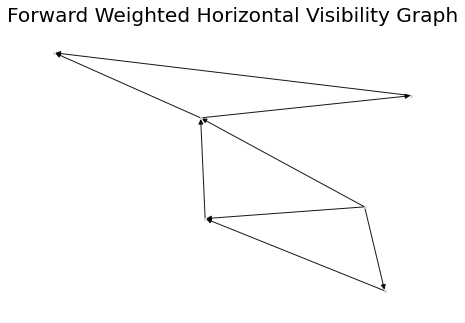

In [ ]:
def show_graph_with_labels(list1, list2):
    #rows, cols = np.where(Weight_Matrix_Forward != 0)
    #values_list = []
    #row = rows.tolist()
    #col = cols.tolist()
    #weight_mat = Weight_Matrix_Forward.tolist()
    #for x in range(len(rows)):
    #  b = row[x]
    #  c = col[x]
    #  values_list.append(weight_mat[b][c]) # stores the weights corresponding to the nodes connected
    
    edges = zip(list1, list2)
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    #dummy = zip(rows.tolist(), cols.tolist()) #to create dictionary for edge_labels
    #zip_iterator = zip(dummy, values_list)
    #edgelabels = dict(zip_iterator)
    #print(edgelabels)
    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(20)
    pos = nx.spring_layout(gr)
    #pos = {0: [0,0],
    #   1: [1,0],
    #   2: [2,0],
    #   3: [3,0],
    #   4: [4,0],
    #   5: [5,0]}

    nx.draw(gr, pos, edge_color='black', width=1, linewidths=1,\
            node_size=5, node_color='#c4daef', alpha=0.9)#,\
            #labels={node:node for node in gr.nodes()})
    #nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='red')



    #nx.draw_networkx(gr, node_size=500, nodelist=nodes, node_color='#c4daef')
    plt.axis('off')
    plt.title("Forward Weighted Horizontal Visibility Graph")
    plt.show()

#nodes = np.arange(0, len(series), 1)
#nodes = nodes.tolist()

show_graph_with_labels(list1, list2)

/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


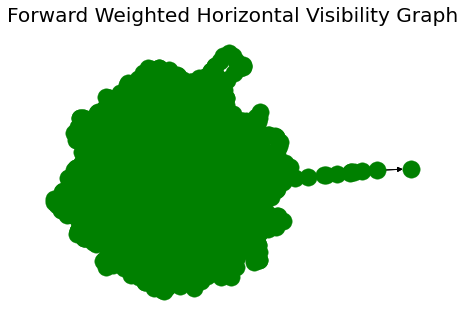

In [ ]:
def show_graph_with_labels(list1, list2, nodes):
    #rows, cols = np.where(Weight_Matrix_Forward != 0)
    #values_list = []
    #row = rows.tolist()
    #col = cols.tolist()
    #weight_mat = Weight_Matrix_Forward.tolist()
    #for x in range(len(rows)):
    #  b = row[x]
    #  c = col[x]
    #  values_list.append(weight_mat[b][c]) # stores the weights corresponding to the nodes connected
    
    edges = zip(list1, list2)
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    #dummy = zip(rows.tolist(), cols.tolist()) #to create dictionary for edge_labels
    #zip_iterator = zip(dummy, values_list)
    #edgelabels = dict(zip_iterator)
    #print(edgelabels)

    #pos = nx.spring_layout(gr)
    #pos = {0: [0,0],
    #   1: [1,0],
    #   2: [2,0],
    #   3: [3,0],
    #   4: [4,0],
    #   5: [5,0]}

    #nx.draw(gr, pos, edge_color='black', width=1, linewidths=1,\
    #        node_size=5, node_color='#c4daef', alpha=0.9,\
    #        labels={node:node for node in gr.nodes()})
    #nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='red')



    #nx.draw_networkx(gr, node_size=500, nodelist=nodes, node_color='#c4daef')
    #plt.axis('off')
    plt.figure()
    nx.draw(gr, node_color ='green')
    plt.title("Forward Weighted Horizontal Visibility Graph")
    plt.show()

nodes = np.arange(0, len(series), 1)
nodes = nodes.tolist()

show_graph_with_labels(list1, list2, nodes)

In [ ]:
def solve (N, Q, A, query):
    # Type your code here
    sum = 0
    print(query)
    for i in range(query):
      q = query[i]
      if q[0] == 0:
        for j in range (q[1], q[2]+1):
          for k in range (j+1, q[2]+1):
            sum = sum + A[j]*A[k]  
        print (sum)
      else:
        x = q[0]
        y = x[1]
        A[x] = q[3]
    return []

N,Q = map(int,input().split())
A = list(map(int, input().split()))
query = [list(map(int, input().split())) for i in range(Q)]
out_ = solve(N, Q, A, query)
print ('\n'.join(map(str, out_)))


KeyboardInterrupt: ignored